### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import nltk
from nltk.corpus import wordnet
from nltk.metrics.distance import edit_distance
import re
import numpy as np

### getting lists of words

In [2]:
file = open('materials.txt', 'r')
materials = file.read().split(',')
file.close()
materials[:8]

['adobe', 'brick', 'matting', 'sod', 'stone', 'timber', 'wattle', 'aluminum']

In [3]:
file = open('shapes.txt', 'r')
shapes = file.read().split('\n')
file.close()
shapes[:7]

['aerodynamic', 'angular', 'flat', 'asymmetrical', 'bent', 'bulbous', 'chunky']

In [4]:
file = open('colors.txt', 'r')
colors = file.read().split('\n')
file.close()
colors[:9]

['black', 'blue', 'cyan', 'gray', 'green', 'grey', 'magenta', 'red', 'white']

In [5]:
file = open('sizes.txt', 'r')
sizes = file.read().split('\n')
file.close()
sizes[:8]

['abundant', 'jumbo', 'puny', 'big', 'boned', 'large', 'scrawny', 'chubby']

### open the data

In [6]:
df=pd.read_csv("item_mapping.csv")

df

,Unnamed: 0,mbta_part_number,description,mfg,mfg_itm_id
0,0,00118006,"STEEL-5/16"" ROUND POLISHED DRILL ROD",HEATHCOTE,GRADE O-1
1,1,00118009,"DRILL ROD - 1/2"" ROUND POLISHED STEEL",GENERIC,GRADE O-1
2,2,00170003,"ROD-WELDING-CARBON STEEL 1/8"" AWS-A5.18-ER70S-2",WELDERS,OX WELD 7
3,3,00170004,"ROD,EXTRACT ALLOY 3/ 32 (5LB. PACKAGE)",X-ERGON,L004-50000
4,4,00170005,"ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)",X-ERGON,L004-4-0000
5,5,00170006,WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE,ALL WELD,#66XHD
6,6,00170009,"ROD-WELDING-MILD STEEL 1/8"" AWS-E6011",COLONY,"1/8"""
7,7,00170010,"ROD-WELDING, MILD STEEL 3/32"" AWS-A5.1-E6011",ALL WELD,#230 ACP 611
8,8,00170011,"ROD-WELDING-CARBON STEEL 3/32 "" AWS-A5.1 - E-7018",DA-VIN CO,MS1120
9,9,00170012,"ROD-WELDING,LOW HY-S TEEL 5/32"" AWS-A5.5 E8016-C1",DA-VIN CO,5/32-MS1140


# Deep analyse
## funcions

### to analyse a single word

In [7]:
def word_analyse(word):
    if wordnet.synsets(word):
        #print(word+' is a word,', end=' ')
        if word.lower() in materials:
            #print('more precisely a material.')
            return 'material'
        elif word.lower() in colors:
            #print('more precisely a color.')
            return 'color'
        elif word.lower() in shapes:
            #print('more precisely a shape.')
            return 'shape'
        elif word.lower() in sizes:
            #print('more precisely a size.')
            return 'size'
        else:
            tok = nltk.word_tokenize(word.lower())
            #print(nltk.pos_tag(tok)[0][1])
            return nltk.pos_tag(tok)[0][1]
    else:
        #print(word+' is not a word,', end=' ')
        sub_words = word.replace('-', ' ').replace(',', ' ').split(' ')
        sub=False
        for word in sub_words:
            if wordnet.synsets(word):
                sub=True
        if sub:
            #print("subwords detected")
            return 'sub'
        else:
            #print('no subword detected')
            return 'none'

def printed_word_analyse(word):
    ana=word_analyse(word)
    if ana=='material':
        print(word+' is a material')
    elif ana=='color':
        print(word+' is a color')
    elif ana=='shape':
        print(word+' is a shape')
    elif ana=='size':
        print(word+' is a size')
    elif ana=='sub':
        print(word+' is not a word, but has subword(s)')
    elif ana=='none':
        print(word+' is not a word, and has no subword')
    else:
        print(word+' is a '+ana)
        
    return ana

printed_word_analyse('STEEL')
printed_word_analyse('POLISHED')
printed_word_analyse('DRILL')
printed_word_analyse('WELDING')
printed_word_analyse('CARBON')
printed_word_analyse('1/8"')
printed_word_analyse('AWS-A5.18-ER70S-2')
printed_word_analyse('2')
printed_word_analyse('A5.18')
printed_word_analyse('ELECTRODE')
printed_word_analyse('STAIN')
printed_word_analyse('ELECTRODE-STAIN')
print('\n\t...some tests')

STEEL is a material
POLISHED is a NNS
DRILL is a shape
WELDING is a VBG
CARBON is a NN
1/8" is not a word, and has no subword
AWS-A5.18-ER70S-2 is not a word, but has subword(s)
2 is a CD
A5.18 is not a word, and has no subword
ELECTRODE is a NN
STAIN is a NN
ELECTRODE-STAIN is not a word, but has subword(s)

	...some tests


#### to normalise a string
*ie:* delete spaces at beginning and end

In [8]:
def norm(ch):
    while ch[0]==' ':
        ch=ch[1:]
    
    while ch[-1]==' ':
        ch=ch[:-1]
    return ch


print('"'+norm('     test    ')+'"')
print('"'+norm('    test test    ')+'"')
print('"'+norm('test')+'"')
print('"'+norm('    test')+'"')
print('"'+norm('test ')+'"')

"test"
"test test"
"test"
"test"
"test"


### to get the main word of the description
*i.e.:* what it is

*e.g.:* WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE      =>     WIRE

In [9]:
def get_main(descr):    
    main=[t for t in descr.replace(',', '-').replace('WITH', '-').split('-')][0]
    if word_analyse(main)=='sub':
        for w in norm(main).split(' '):
            if word_analyse(w) in ['NN', 'NNS']:
                main=w
        
    if word_analyse(main) in ['material', 'color', 'shape', 'size', 'none', 'sub']:
        if len([t for t in descr.replace(',', '-').replace('WITH', '-').split('-')])==1:
            main=[t for t in descr.split(' ')][0]
        else:
            main=[t for t in descr.split(' ')][-1]
    
    return main



def printed_get_main(descr):
    print('\t'+descr)
    main=get_main(descr)
    print('main word: '+main)
    return main

a=df["description"][5]
print("getting main word:\n")
printed_get_main(a)
print('')

getting main word:

	WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE
main word: WIRE



### to split a string into words

In [10]:
def split_words(descr):
    l=descr.split(' ')
    i=0
    while i<len(l):
        if word_analyse(l[i])=='sub':
            subs=l[i].replace('-', ' ').replace(',', ' ').split(' ')
            l=l[:i]+subs+l[i+1:]
        i+=1
    return l


a=df["description"][15000]

print(a)
print("\n\tsplitting into words:\n")
print(split_words(a))

LOCK LEVER, ISLAND HOUSING, VACUUM ISLAND FAREBOX

	splitting into words:

['LOCK', 'LEVER', '', 'ISLAND', 'HOUSING', '', 'VACUUM', 'ISLAND', 'FAREBOX']


### to get the description of the package involved
#### (if there is one)
*ie:* quantity, unit, type if defined

see https://regex101.com/r/oxWBmt/3 for more tests of the regular expression

In [11]:
regex_package = r"\(? ?[0-9]+ ?[PERLBFTYDS\.']*\/? ?(PACKAGE|PKG|PK|ROLL|RLS|COIL|REEL|REELS|BOX|BXE|BXS|BX)[\)\., -]*"
regex_quantity = r"[0-9]+"
regex_unit = r"(LB|FT|YDS|PER|P[^K]|')"
regex_type = r"(PACKAGE|PKG|PK|ROLL|RLS|COIL|REEL|REELS|BOX|BXE|BXS|BX)"
prog_quantity = re.compile(regex_quantity)
prog_unit = re.compile(regex_unit)
prog_type = re.compile(regex_type)
prog_package = re.compile(regex_package)

def get_package(descr):
    remain_descr = prog_package.split(descr)[0]
    result=prog_package.search(descr)
    if result is None:
        package_quantity, package_unit, package_type = None, None, None
    else:
        package = result.group()
        package_quantity = prog_quantity.search(package).group()
        package_type = prog_type.search(package).group()
        
        res=prog_unit.search(package)
        if res is None:
            package_unit = None
        else:
            package_unit = res.group()

    return (remain_descr, package_quantity, package_unit, package_type)


a=df["description"][4]
print(a)
get_package(a)

ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)


('ROD, EXTRACT ALLOY 1 /8 ', '5', 'LB', 'PACKAGE')

In [12]:
test_str = ("ROD-BRAZING BRZFC 3/32\"\" X36\"\" X 10 LB AWS 5-8-92",
            "ROD-WELDING-MILD STEEL 1/8\"\" AWS-A5.1 E6010\t", 
            "CABLE-14 GAUGE BLACK AUTOMOTIVE PRIMARY WIRE 100/ROLL\n", 
            "BAG-POLY 2 MIL, LOC TOP, 4\"\" X 6\"\" -UOM EA. (100/PKG, 1000/BX)\n", 
            "BOLT-MACH 1X8 1/2 HV Y SQ HD W/HVY HEX NUT-10 P/PK\n", 
            "BOLT-MACHINE 1X7 REG SQ.W/HEAVY HEX NUT -10 P/PKG\n", 
            "BOLT HX HD 1/2-13X1- 1/4 GRAD 5 ZINC PLT 50/BOX\n", 
            "TUBING- 1 1/8 OD COPPER .050 WALL TYPE L 60'/ROLL", 
            "NLA -LABEL-POLY TRANS IP BAR CODE 3"" X2"" (2500 P/ROLL)", 
            "WIRE-NO. 12 AWG 19 ST RAND-BLACK COPPER 500FT/ROLL", 
            "FABRIC VINYL COATED JADE GREEN T-97 APP 35YDS/ROLL", 
            "BOLT-COMMON CARR 1/2 X 4 1/2 W/ NUT ( 25 P/PKG.)\n", 
            "NUT HEX PLAIN STL CA D PLT 5/16-18 100/BOX\n", 
            "NUT-HEX PLAIN STL CA D PLT 3/8-16 100/PK\n", 
            "BOLT HX CAP G#8 3/4- 16 X 3-1/4 25/BXE THREAD\n", 
            "BOLT HX CAP G#8 5/8- 11 X 4 25/BX\n", 
            "BOLT-COMMON CARR W/N UT - 100 P/PKG. -\n", 
            "ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)\n", 
            "ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)\n", 
            "BOOT-DUST 10 PER PKG"
           )

for s in test_str:
    pk=get_package(s)
    for ele in pk:
        print(ele, end='\t')
    print()


ROD-BRAZING BRZFC 3/32"" X36"" X 10 LB AWS 5-8-92	None	None	None	
ROD-WELDING-MILD STEEL 1/8"" AWS-A5.1 E6010		None	None	None	
CABLE-14 GAUGE BLACK AUTOMOTIVE PRIMARY WIRE	100	None	ROLL	
BAG-POLY 2 MIL, LOC TOP, 4"" X 6"" -UOM EA. 	100	None	PKG	
BOLT-MACH 1X8 1/2 HV Y SQ HD W/HVY HEX NUT-	10	P/	PK	
BOLT-MACHINE 1X7 REG SQ.W/HEAVY HEX NUT -	10	P/	PKG	
BOLT HX HD 1/2-13X1- 1/4 GRAD 5 ZINC PLT	50	None	BOX	
TUBING- 1 1/8 OD COPPER .050 WALL TYPE L	60	'	ROLL	
NLA -LABEL-POLY TRANS IP BAR CODE 3 X2 	2500	P/	ROLL	
WIRE-NO. 12 AWG 19 ST RAND-BLACK COPPER	500	FT	ROLL	
FABRIC VINYL COATED JADE GREEN T-97 APP	35	YDS	ROLL	
BOLT-COMMON CARR 1/2 X 4 1/2 W/ NUT 	25	P/	PKG	
NUT HEX PLAIN STL CA D PLT 5/16-18	100	None	BOX	
NUT-HEX PLAIN STL CA D PLT 3/8-16	100	None	PK	
BOLT HX CAP G#8 3/4- 16 X 3-1/4	25	None	BXE	
BOLT HX CAP G#8 5/8- 11 X 4	25	None	BX	
BOLT-COMMON CARR W/N UT -	100	P/	PKG	
ROD, EXTRACT ALLOY 1 /8 	5	LB	PACKAGE	
ROD, EXTRACT ALLOY 1 /8 	5	LB	PACKAGE	
BOOT-DUST	10	PER	PKG	


### to get the reference of the product

In [13]:
def get_reference(descr):
    d=descr.split('AWS')
    remain_descr=d[0]
    if len(d)==1:
        reference=None
    else:
        reference='AWS'+d[1]
    return (remain_descr, reference)


a=df["description"][2]
print(a)
get_reference(a)

ROD-WELDING-CARBON STEEL 1/8" AWS-A5.18-ER70S-2


('ROD-WELDING-CARBON STEEL 1/8" ', 'AWS-A5.18-ER70S-2')

### to get the description of the sizes involved
#### (if there are some)
*ie:* quantities, units if defined

see https://regex101.com/r/JDgBw7/5 for more tests of the regular expression

In [14]:
regex_size=r'[0-9.]+ ?\/? ?[0-9.\/ ]* ?-?("|OZ|V|C |IN.|IN|LB|FT([^\/]|$)|F[^T]|AM|A,|MM|WATT|GAL|HR|FEET|METER|OHM|UF|%|NH)'


regex_quantity = r"[0-9\/.]+"
regex_size_unit = r'("|OZ|V|C|IN|LB|FT|F|AM|A|MM|WATT|GAL|HR|FEET|METER|OHM|UF|%|NH)'
prog_quantity = re.compile(regex_quantity)
prog_size_unit = re.compile(regex_size_unit)
prog_size = re.compile(regex_size)

def get_sizes(descr):
    remain_descr=prog_size.sub("", descr)
    
    
    results=prog_size.finditer(descr)
    sizes=[]
    for result in results:
        size = result.group()
        size_quantity = prog_quantity.search(size).group()
        size_unit = prog_size_unit.search(size).group()
        #transform abreviations in full words
        if size_unit=='"':
            size_unit='INCH'
        elif size_unit=='IN':
            size_unit='INCH'
        elif size_unit=='V':
            size_unit='VOLT'
        elif size_unit=='AM':
            size_unit='AMP'
        elif size_unit=='A,':
            size_unit='AMP'
        elif size_unit=='C':
            size_unit='COULOMB'
        elif size_unit=='FT':
            size_unit='FEET'
        elif size_unit=='F':
            size_unit='FARADE'
        elif size_unit=='HR':
            size_unit='HOUR'
        elif size_unit=='MM':
            size_unit='MilliMeter'
        #put size tulpe in list of sizes
        sizes.append((size_quantity, size_unit))
        
    return (remain_descr, sizes)


a=df["description"][8650]
print(a)
get_sizes(a)

CAPACITOR, 47000UF- 40VDC76MMX105MM ( KENDEIL )


('CAPACITOR, - DCX ( KENDEIL )',
 [('47000', 'UF'),
  ('40', 'VOLT'),
  ('76', 'MilliMeter'),
  ('105', 'MilliMeter')])

#### few tests

In [15]:
test="""TUBING-COPPER 3/8"" NOM 1/2"" OD TYPE L SOFT TEMPER 60FT/COIL
WIRE-2 AWG SGL COND DLO 2000V 90 C 1000/ROLL
SPRAY-ANTI SPATTER 16 OZ
ROD-WELDING-CARBON STEEL-1/8"" AWS-A5.1-E7018
BOLT-5/8"" X 2 3/4"" GRADE 8 SAE (50 P/PKG)
STEEL-5/16"" ROUND POLISHED DRILL ROD
ROD, EXTRACT ALLOY 1 /8
ALLOY-1/8 CERTANIUM 70F FLUX COATED HI STRENGTH
FILE 10 INCH ROUND BASTARD
FILES 14 IN. ROUND BASTARD
FILES-6IN MILL BASTARD
FILES-10 IN MILL BASTARD
HAMMERS-12 LB DF STRIKING
PUNCH LONG TAPERED 5 /8 IN STOCK 12"" LONG 3/16 POINT
SAWS- 2"" INCH H.S.HO LE (DO NOT BUY B&D)
RESISTOR, 24V ( MCC ) HTR/DEF N/F DIESEL
CIRCUIT BREAKER- 15 AMP-10 HP ( ALLEN BRADLEY ) NEO
HORN - HIGH TONE ONLY , 24VOLT ( WOLO )
HOLDER, FUSE ,30 AMP, 12 GUAGE- 3.0 MM ,ORANGE WIRE
EQUALIZER, W/ BATTERY MONITOR 100A,12-24V (VANNER) DMA ONLY
DOME, 2.5 MM - WHITE HOUSING ( SAFETY VISION ) NF
VIDEO CABLE, CAMERA ( 500 FT= EA SPOOL) BELDEN
CYLINDER ASSY,60LBS ACC DR NF40'HYB, 40'CNG
WASHER,HARD 3/8 FRT RAD RD NF HYB
BRAKE CHAMBER FRT ASSY R & L HAND 2.5 INCH LONG STROKE
PROTECTOR-COIL 10 AM P FOR E7927-E7505
RDT-40 3RD RAIL HEATER 40WATT/PORT, 52' 6"" LONG
OIL-FAST CUTTING HONING (5 GALLON PAILS)
HEADLIGHT ASSY, HIGH BEAM 2000 HR , NABI
HOSE ASSEMBLY -3/8 PNEUMATIC - 50 FEET WITH ¼ FITTINGS
SIMPSON TEST LEADS - SERIES 7 METER
WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE
TAPE SWITCH 3.5 FT"""

for descr in test.split('\n'):
    print(descr)
    print(get_sizes(descr), '\n')

TUBING-COPPER 3/8"" NOM 1/2"" OD TYPE L SOFT TEMPER 60FT/COIL
('TUBING-COPPER " NOM " OD TYPE L SOFT TEMPER 60FT/COIL', [('3/8', 'INCH'), ('1/2', 'INCH')]) 

WIRE-2 AWG SGL COND DLO 2000V 90 C 1000/ROLL
('WIRE-2 AWG SGL COND DLO  1000/ROLL', [('2000', 'VOLT'), ('90', 'COULOMB')]) 

SPRAY-ANTI SPATTER 16 OZ
('SPRAY-ANTI SPATTER ', [('16', 'OZ')]) 

ROD-WELDING-CARBON STEEL-1/8"" AWS-A5.1-E7018
('ROD-WELDING-CARBON STEEL-" AWS-A5.1-E7018', [('1/8', 'INCH')]) 

BOLT-5/8"" X 2 3/4"" GRADE 8 SAE (50 P/PKG)
('BOLT-" X " GRADE 8 SAE (50 P/PKG)', [('5/8', 'INCH'), ('2', 'INCH')]) 

STEEL-5/16"" ROUND POLISHED DRILL ROD
('STEEL-" ROUND POLISHED DRILL ROD', [('5/16', 'INCH')]) 

ROD, EXTRACT ALLOY 1 /8
('ROD, EXTRACT ALLOY 1 /8', []) 

ALLOY-1/8 CERTANIUM 70F FLUX COATED HI STRENGTH
('ALLOY-1/8 CERTANIUM FLUX COATED HI STRENGTH', [('70', 'FARADE')]) 

FILE 10 INCH ROUND BASTARD
('FILE H ROUND BASTARD', [('10', 'INCH')]) 

FILES 14 IN. ROUND BASTARD
('FILES  ROUND BASTARD', [('14', 'INCH')]) 

FI

### to guess the sizes without units
**first, make a dic of common sizes**

In [16]:
# a useful function
def delete_spaces(ch):
    return ch.replace(' ', '')

delete_spaces(' ksjfk  sv sv515sv s64 6 668   ')

'ksjfksvsv515svs646668'

### cerate common sizes dictionary (c_dic)

(uncomment cells to calculate again the dictionary)

In [17]:
# def get_only_sizes(descr):
#     return get_sizes(descr)[1:]

# common_dic={}
# for i in range(len(df)):
#     main=get_main(df["description"][i])
#     sizes=get_only_sizes(df["description"][i])
#     for s in sizes:
#         if s!=[]:
#             try:
#                 if not s in common_dic[main]:
#                     common_dic[main].append(s)
#             except:
#                 common_dic[main]=[s]

In [18]:
# c_dic={} #list of common tuples (size, unit) by main word
# for k in common_dic.keys():
#     l=[]
#     for i in range(len(common_dic[k])):
#         for j in range(len(common_dic[k][i])):
#             l.append((delete_spaces(common_dic[k][i][j][0]), common_dic[k][i][j][1]))
#     c_dic[k]=l

# c_dic['ROD']

### save c_dic in a file

In [19]:
# np.save('common_sizes_dic.npy', c_dic) 

### load c_dic from file

In [20]:
c_dic = np.load('common_sizes_dic.npy').item()
print(c_dic['ROD'])

[('5/16', 'INCH'), ('1/2', 'INCH'), ('1/8', 'INCH'), ('5', 'LB'), ('3/32', 'INCH'), ('5/32', 'INCH'), ('1/16', 'INCH'), ('5', 'INCH'), ('3/32', 'INCH'), ('36', 'INCH'), ('10', 'LB'), ('1/4', 'INCH'), ('12', 'INCH'), ('1/8', 'INCH'), ('36', 'INCH'), ('3/16', 'INCH'), ('.', 'VOLT'), ('20', 'INCH'), ('52', 'INCH'), ('3/4', 'INCH'), ('8', 'FEET'), ('5/8', 'INCH'), ('6', 'FEET'), ('3/4', 'INCH'), ('6', 'FEET'), ('5', 'FEET'), ('5', 'FARADE'), ('3873', 'FARADE'), ('1/8', 'INCH'), ('1', 'LB')]


In [21]:
def guess_unit(main, nb):
    try:
        r=range(len(c_dic[main]))
    except:
        return None
    else:
        for i in range(len(c_dic[main])):
            if nb==c_dic[main][i][0]:
                return c_dic[main][i][1]
    return None

In [22]:
regex_nbs=r'[0-9]+ ?\/? ?[0-9.\/ ]*'
prog_nbs = re.compile(regex_nbs)

def get_nbs(descr):
    remain_descr=prog_nbs.sub("", descr)
    
    results=prog_nbs.finditer(descr)
    nbs=[]
    sizes=[]
    for result in results:
        nb = delete_spaces(result.group())
        unit=guess_unit(get_main(descr), nb)
        if not unit is None:
            sizes.append((nb, unit))
        else:
            nbs.append(nb)
    
    return (remain_descr, sizes, nbs)


#a small test
a=df["description"][47]
print(a)
a, sizes=get_sizes(a)
print(a, sizes, '    => "sure sizes"')
a, unsure_sizes, nbs=get_nbs(a)
print(a, sizes, unsure_sizes, nbs, '    => "guess sizes" & others numerical values', sep=' ; ')

ROD-BRAZING ELECTRD 1/8 DIA NEPTUNE/G #624 NASSAU
ROD-BRAZING ELECTRD 1/8 DIA NEPTUNE/G #624 NASSAU []     => "sure sizes"
ROD-BRAZING ELECTRD DIA NEPTUNE/G #NASSAU ; [] ; [('1/8', 'INCH')] ; ['624'] ;     => "guess sizes" & others numerical values


=> I think that it is now okay to mix guess and sure sizes, as I am using your method (matching unit iff size value match with main word)

### to get an anlyse where each word have exact description
*ie:* color, shape...

In [23]:
def full_analyse(descr):
    #get main word
    main=get_main(descr)
    #get reference
    descr, ref = get_reference(descr)
    #get package description
    pkg={}
    descr, pkg["quantity"], pkg["unit"], pkg["type"] = get_package(descr)
    if pkg["quantity"]==None and pkg["unit"]==None and pkg["type"]==None:
        pkg=None
    #get sizes description
    descr, sizes = get_sizes(descr)
#     if sizes==[]:
#         sizes=None
    #get unsure sizes/other numbers
    descr, guess_sizes, nbs=get_nbs(descr)

    #split to words
    list_words=split_words(descr)
    
    #create final dictionary
    dic={'main':main, 'ref':ref, 'pkg':pkg, 'sure_sizes':sizes, 'guess_sizes':guess_sizes, 'nbs':nbs}
    
    
    #loop for remaining words
    for w in list_words:
        if w=='':
            pass
        elif w=='-':
            pass
        elif w=='"':
            pass
        elif w==main:
            pass
        else:
            ana=word_analyse(w)
            try:
                dic[ana].append(w)
            except:
                dic[ana]=[w]
    return dic


def printed_full_analyse(descr):
    print('\t'+descr)
    dic=full_analyse(descr)
    for k in dic:
        print(k, ':', dic[k])
    return dic




a=df["description"][4]

print("full analysing:\n")
printed_full_analyse(a)
print('')

full analysing:

	ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)
ref : None
NN : ['EXTRACT', 'ALLOY']
pkg : {'quantity': '5', 'type': 'PACKAGE', 'unit': 'LB'}
sure_sizes : []
nbs : []
main : ROD
guess_sizes : [('1/8', 'INCH')]



#### small useful functions

In [24]:
# to know if there is a number in the string
def has_nb(inputString):
    return any(char.isdigit() for char in inputString)
# to know if there is not a number in the string
def has_no_nb(inputString):
    return not any(char.isdigit() for char in inputString)
# to know if the string is small
def is_short(inputString):
    return len(inputString)<3
# to know if the string is large
def is_long(inputString):
    return len(inputString)>=3

#### to put together diferent keys of a dictionary

In [25]:
#an other useful function
def put_together(dic, new_key, keys, delete=False, condition=lambda a:True):
    dic[new_key]=[]
    for k in keys:
        try:
            dic[k]
        except:
            pass
        else:
            for w in dic[k]:
                if condition(w):
                    dic[new_key].append(w)
            if delete:
                del dic[k]

### to get an analyse where each word has a smart description
*ie:* main, reference, package, size...

In [26]:
def short_analyse(descr, join_sizes=True):
    dic=full_analyse(descr)
    
    put_together(dic, 'num', ['CD', 'none'], False, has_nb)
    put_together(dic, 'numerical', ['num', 'nbs'], True)
    if join_sizes:
        put_together(dic, 'sizes', ['sure_sizes', 'guess_sizes'], True)
    try:
        #del dic['nbs']
        del dic['CD']
    except:
        pass
    
    
    other_keys=list(dic.keys())
    for k in ['numerical', 'none', 'main', 'ref', 'pkg', 'sizes', 'sure_sizes', 'guess_sizes']:
        if k in other_keys:
            other_keys.remove(k)
    put_together(dic, 'adjectives', other_keys, False, is_long)
    
    put_together(dic, 'other1', ['none'], True, has_no_nb)
    put_together(dic, 'other2', other_keys, True, is_short)
    put_together(dic, 'others', ['other1', 'other2'], True)

    return dic

def printed_short_analyse(descr):
    print('\t'+descr)
    dic=short_analyse(descr)
    for k in dic:
        if dic[k]!=None and dic[k]!=[]:
            print(k, ':', dic[k])
    return dic

a=df["description"][8651]
a=df["description"][4]

print("analysing: *full*\n")
printed_full_analyse(a)
print("\n\nanalysing: *short*\n")
printed_short_analyse(a)
print('')

analysing: *full*

	ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)
ref : None
NN : ['EXTRACT', 'ALLOY']
pkg : {'quantity': '5', 'type': 'PACKAGE', 'unit': 'LB'}
sure_sizes : []
nbs : []
main : ROD
guess_sizes : [('1/8', 'INCH')]


analysing: *short*

	ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)
adjectives : ['EXTRACT', 'ALLOY']
pkg : {'quantity': '5', 'type': 'PACKAGE', 'unit': 'LB'}
main : ROD
sizes : [('1/8', 'INCH')]



## tests of the analyse
(testing the smartest one, ie the short one)

In [27]:
for i in [0,1,2,3,4]:
    print('\t'+str(i))
    a=df["description"][i]
    printed_short_analyse(a)
    print('')


	0
	STEEL-5/16" ROUND POLISHED DRILL ROD
adjectives : ['STEEL', 'POLISHED', 'ROUND', 'DRILL']
main : ROD
sizes : [('5/16', 'INCH')]

	1
	DRILL ROD - 1/2" ROUND POLISHED STEEL
adjectives : ['STEEL', 'POLISHED', 'DRILL', 'ROUND']
main : ROD
sizes : [('1/2', 'INCH')]

	2
	ROD-WELDING-CARBON STEEL 1/8" AWS-A5.18-ER70S-2
ref : AWS-A5.18-ER70S-2
adjectives : ['WELDING', 'CARBON', 'STEEL']
main : ROD
sizes : [('1/8', 'INCH')]

	3
	ROD,EXTRACT ALLOY 3/ 32 (5LB. PACKAGE)
adjectives : ['EXTRACT', 'ALLOY']
pkg : {'quantity': '5', 'type': 'PACKAGE', 'unit': 'LB'}
main : ROD
sizes : [('3/32', 'INCH')]

	4
	ROD, EXTRACT ALLOY 1 /8 (5 LB. PACKAGE)
adjectives : ['EXTRACT', 'ALLOY']
pkg : {'quantity': '5', 'type': 'PACKAGE', 'unit': 'LB'}
main : ROD
sizes : [('1/8', 'INCH')]



In [28]:
for i in [5,20,50,100,5000]:
    print('\t'+str(i))
    a=df["description"][i]
    printed_short_analyse(a)
    print('')


	5
	WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE
others : ['AC/DC', 'X', 'TM']
adjectives : ['WELDING', 'ELECTRODE']
numerical : ['1/8']
main : WIRE
sizes : [('.660', 'NH')]

	20
	ROD 5/32 STEEL WELDING HOBART
adjectives : ['WELDING', 'ROD', 'STEEL']
numerical : ['5/32']
main : HOBART

	50
	ROD-WELDING ALUMINUM 3/32" AWS-A5.3 E4043
ref : AWS-A5.3 E4043
adjectives : ['WELDING', 'ALUMINUM']
main : ROD
sizes : [('3/32', 'INCH')]

	100
	CABLE-14 GAUGE BLUE AUTOMOTIVE PRIMARY WIRE 100/ROLL
adjectives : ['GAUGE', 'PRIMARY', 'WIRE', 'AUTOMOTIVE', 'BLUE']
pkg : {'quantity': '100/', 'type': 'ROLL', 'unit': None}
main : CABLE
sizes : [('14', 'FARADE')]

	5000
	SCREWDRIVER-#2 PHILLIPS HEAD 4IN. BLADE
others : ['#PHILLIPS']
adjectives : ['HEAD', 'BLADE']
numerical : ['2']
main : SCREWDRIVER
sizes : [('4', 'INCH')]



In [29]:
for i in [10000,15000,20000,25000,30000]:
    print('\t'+str(i))
    a=df["description"][i]
    printed_short_analyse(a)
    print('')


	10000
	CONNECTOR BUTT 2/0 2/0 H.D. (PK)
others : ['H.D.', '(PK)']
adjectives : ['CONNECTOR']
numerical : ['2/02/0']
main : BUTT

	15000
	LOCK LEVER, ISLAND HOUSING, VACUUM ISLAND FAREBOX
others : ['FAREBOX']
adjectives : ['LOCK', 'ISLAND', 'HOUSING', 'VACUUM', 'ISLAND']
main : LEVER

	20000
	" L" LINK
others : ['L"']
main : LINK

	25000
	MOTOR WITH INTERNAL DRIVE, FOR BOOSTER
others : ['WITH', 'FOR']
adjectives : ['INTERNAL', 'DRIVE', 'BOOSTER']
main : MOTOR

	30000
	BATTERIES 6-VOLT SPRING TERMINALS NEDA TYPE 908
others : ['OLT', 'NEDA']
adjectives : ['SPRING', 'TYPE', 'TERMINALS']
numerical : ['908']
main : BATTERIES
sizes : [('6', 'VOLT')]



# design metric distance

In [30]:
def metric(descr1, descr2):
    d=0
    add=1
    ana1=short_analyse(descr1)
    ana2=short_analyse(descr2)
    #main word
    if ana1['main']!=ana2['main']:
        d+=1
    else:
        add*=0.5
    #adjectives
    if ana1['adjectives'] is None or ana2['adjectives'] is None:
        d+=add
    else:
        for adj1 in ana1['adjectives']:
            for adj2 in ana2['adjectives']:
                if adj1==adj2:
                    d+=0
                else:
                    d+=add*edit_distance(adj1, adj2)/(len(adj1)+len(adj2))/(len(ana1['adjectives'])*len(ana2['adjectives']))
    #sizes
    if ana1['sizes'] is None or ana2['sizes'] is None:
        d+=add
    else:
        for size1 in ana1['sizes']:
            for size2 in ana2['sizes']:
                if size1[1]==size2[1]:
                    if size1[0]==size2[0]:
                        d+=add*0.3/(len(ana1['sizes'])*len(ana2['sizes']))
                    else:
                        d+=add*0.6/(len(ana1['sizes'])*len(ana2['sizes']))
                else:
                    d+=add/(len(ana1['sizes'])*len(ana2['sizes']))
    #package
    if ana1['pkg'] is None or ana2['pkg'] is None:
        d+=add
    else:
        for pkg1 in ana1['pkg']:
            for pkg2 in ana2['pkg']:
                if pkg1[1]==pkg2[1]:
                    if pkg1[0]==pkg2[0]:
                        d+=add*0.3/(len(ana1['pkg'])*len(ana2['pkg']))
                    else:
                        d+=add*0.6/(len(ana1['pkg'])*len(ana2['pkg']))
                else:
                    d+=add/(len(ana1['pkg'])*len(ana2['pkg']))
    return d
                
    

In [31]:
for i, j in [(1,1),(1,2),(1,5),(1,10),(1,25),(5,10),(5,50),(5,500)]:
    print('\t\t'+str(i)+'-'+str(j))
    a=df["description"][i]
    b=df["description"][j]
    print(a)
    print(b)
    print('\td='+str(metric(a,b)))
    print()

		1-1
DRILL ROD - 1/2" ROUND POLISHED STEEL
DRILL ROD - 1/2" ROUND POLISHED STEEL
	d=0.8336538461538462

		1-2
DRILL ROD - 1/2" ROUND POLISHED STEEL
ROD-WELDING-CARBON STEEL 1/8" AWS-A5.18-ER70S-2
	d=1.0297681485181487

		1-5
DRILL ROD - 1/2" ROUND POLISHED STEEL
WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE
	d=3.529359243697479

		1-10
DRILL ROD - 1/2" ROUND POLISHED STEEL
ROD-WELDING, COPPER 1/8" AWS-A5.27-RCUZN-B
	d=1.045819805194805

		1-25
DRILL ROD - 1/2" ROUND POLISHED STEEL
ALLOY-1/8 CERTANIUM 70F FLUX COATED HI STRENGTH
	d=3.2851005476005475

		5-10
WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE
ROD-WELDING, COPPER 1/8" AWS-A5.27-RCUZN-B
	d=3.392948717948718

		5-50
WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE
ROD-WELDING ALUMINUM 3/32" AWS-A5.3 E4043
	d=3.3426470588235295

		5-500
WIRE WELDING - 1/8 X .660 NH TM AC/DC ELECTRODE
WASHER - LOCK SPLIT RING 5/8 GD 8 ZINC YELLOW 100/PK
	d=3.497224442224442



# clustering part

#### importations & data representation

In [32]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fclusterdata
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [33]:
#brute
print('Data')
X=np.array(df['description'])
print(X)
#formated
print('\nData will be represented by index n the df (as we can only classify nubers)\n\nNew Data:')
X=np.array([(i,1) for i in range(len(df))])
print(X)

Data
['STEEL-5/16" ROUND POLISHED DRILL ROD'
 'DRILL ROD - 1/2" ROUND POLISHED STEEL'
 'ROD-WELDING-CARBON STEEL 1/8" AWS-A5.18-ER70S-2' ...,
 'VALVE 3 WAY SOLENOID WTR WASH CONTRL ASSY IDP 6499'
 'FILTER - WATER WASH CONTROL IPD 6499' 'OIL-REGAL NO.46 R AN D O TURBINE']

Data will be represented by index n the df (as we can only classify nubers)

New Data:
[[    0     1]
 [    1     1]
 [    2     1]
 ..., 
 [32994     1]
 [32995     1]
 [32996     1]]


In [34]:
# a custom function thatdxrd just computes distance between two index (due to specific data represetation)
def mydist(p1, p2):
    a=df["description"][p1[0]]
    b=df["description"][p2[0]]
    return metric(a,b)

### Take only few rows to save computation time

In [35]:
nb=20
y=X[:nb]
#if want full data, un-comment the following line:
#y=X
y

array([[ 0,  1],
       [ 1,  1],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1]])

## starts clustering

### clustering dendrogram
**=> useful to know how data behaves**

In [36]:
### compute linkage matrix
print(len(y), 'rows...')
Z = linkage(y, 'complete', metric=mydist)
#see https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

20 rows...


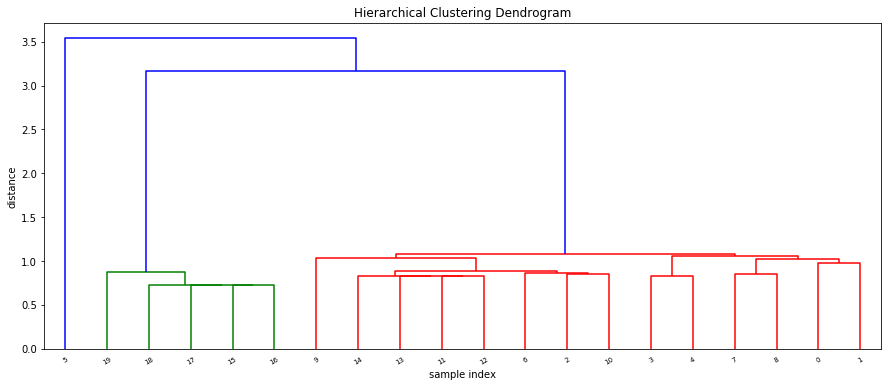

In [37]:
plt.figure(figsize=(15, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='none',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters, if  truncate_mode='lastp'
    leaf_rotation=30., # (display) rotation of numbers on x-axis
    leaf_font_size=7., # (display) size numbers on x-axis
)
#see https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.show()

=> cool graph ;)

In [38]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

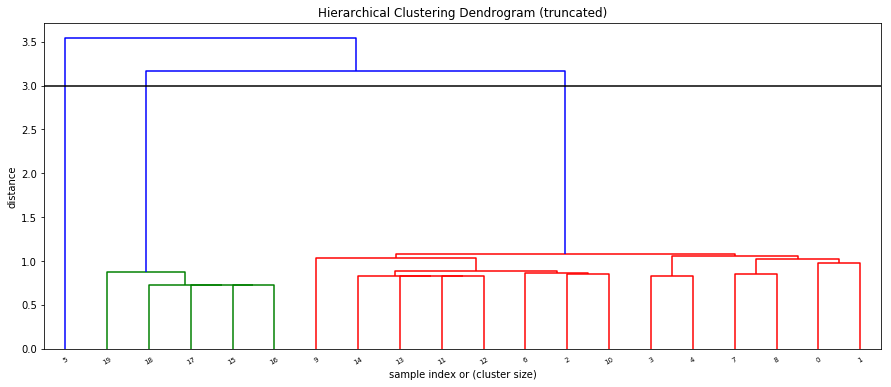

In [39]:
plt.figure(figsize=(15, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    truncate_mode='none',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters, if  truncate_mode='lastp'
    leaf_rotation=30., # (display) rotation of numbers on x-axis
    leaf_font_size=7., # (display) size numbers on x-axis
    annotate_above=40,
    show_contracted=True,
    max_d=3,
)
plt.show()

## clustering...

### ...with maximum distance between groups

In [40]:
fclust = fclusterdata(y, 1.0, metric=mydist, criterion='distance') # makes groups of distance at most 0.9
#see https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fclusterdata.html

fclust

array([2, 2, 3, 3, 3, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1], dtype=int32)

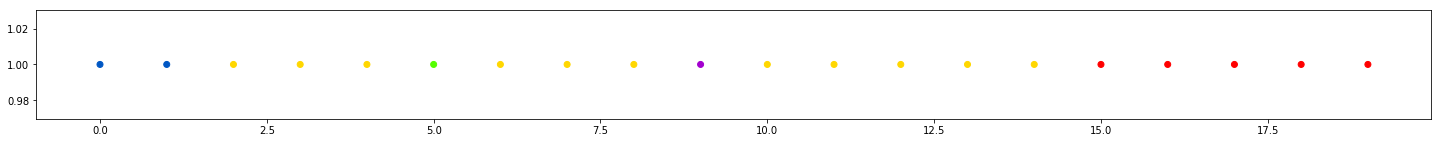

In [41]:
plt.figure(figsize=(25, 2))
plt.scatter(X[:nb,0], X[:nb,1], c=fclust, cmap='prism')  # plot points with cluster dependent colors
plt.show()

=> good result

### ...with maximum number of groups

In [42]:
fclust = fclusterdata(y, 5, metric=mydist, criterion='maxclust') # makes groups with max number of groups
fclust

array([2, 2, 3, 3, 3, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1], dtype=int32)

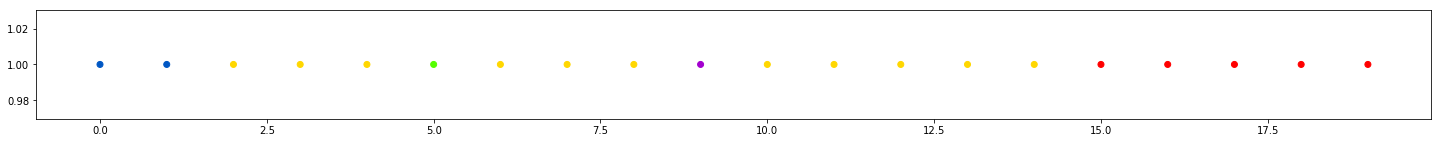

In [43]:
plt.figure(figsize=(25, 2))
plt.scatter(X[:nb,0], X[:nb,1], c=fclust, cmap='prism')  # plot points with cluster dependent colors
plt.show()

=> not working very well